In [9]:
import tushare as ts
import time
import pandas as pd
from pandas import datetime

In [6]:
ts.set_token("a8588911ddccc8cd5e3d30dcfca06623edda20ae7980edf8d2f2f947")
pro = ts.pro_api()


In [3]:
for i in range (1,800):
    number = 300000+i
    if number%200 == 0:
        time.sleep(120)
    tf = pro.daily(ts_code=str(number)+'.SZ', start_date='20040101', end_date='20200229')
    tf.to_csv("./Desktop/text/1/"+str(number)+".csv")

 一些测试

data=pd.read_csv("./Desktop/text/1/300361.csv")
if data.empty:
    print("1")
else:
    print("2")
    
print(data.iloc[:,0].size)
data372=pd.read_csv("./Desktop/text/1/300372.csv")
print(data372.iloc[:,0].size)

In [50]:
data=pd.read_csv("./Desktop/text/300000/300001.csv") 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 12 columns):
Unnamed: 0    2419 non-null int64
ts_code       2419 non-null object
trade_date    2419 non-null int64
open          2419 non-null float64
high          2419 non-null float64
low           2419 non-null float64
close         2419 non-null float64
pre_close     2419 non-null float64
change        2419 non-null float64
pct_chg       2419 non-null float64
vol           2419 non-null float64
amount        2419 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 226.9+ KB


In [51]:
data=pd.read_csv("./Desktop/text/300000/300001.csv") 
data=data.drop(columns=["Unnamed: 0","ts_code","pre_close","pct_chg"])
data['trade_date'] = data['trade_date'].map(lambda x:datetime.strptime(str(x),'%Y%m%d'))
df = data.set_index('trade_date')
df = df.sort_index()
df['ma5']=df['close'].rolling(5).mean()
df['ma10']=df['close'].rolling(10).mean()
df = df[df.index>df.index[9]]

In [33]:
df

,Unnamed: 0,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2009-10-30,2418,300001.SZ,42.00,64.00,35.01,44.00,23.80,20.20,84.8700,236085.62,1.050134e+06
2009-11-02,2417,300001.SZ,39.60,41.87,39.60,39.60,44.00,-4.40,-10.0000,65707.15,2.617879e+05
2009-11-03,2416,300001.SZ,38.20,39.36,36.15,36.90,39.60,-2.70,-6.8200,65993.17,2.463969e+05
2009-11-04,2415,300001.SZ,38.00,38.90,37.23,38.02,36.90,1.12,3.0400,40764.44,1.544647e+05
2009-11-05,2414,300001.SZ,38.03,40.98,37.51,39.60,38.02,1.58,4.1600,53524.30,2.099284e+05
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,4,300001.SZ,25.01,25.20,24.53,24.93,25.43,-0.50,-1.9662,303970.21,7.547625e+05
2020-02-25,3,300001.SZ,24.30,25.76,23.55,25.00,24.93,0.07,0.2808,445802.96,1.105106e+06
2020-02-26,2,300001.SZ,24.34,24.74,23.28,23.29,25.00,-1.71,-6.8400,312641.47,7.500949e+05


In [12]:
#处理时间连续 数据空值的情况  
data=df.index.to_list()
data_list=[]
for i in range (0,len(data)):
    data_list.append(data[i].strftime("%Y-%m-%d"))

In [13]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt

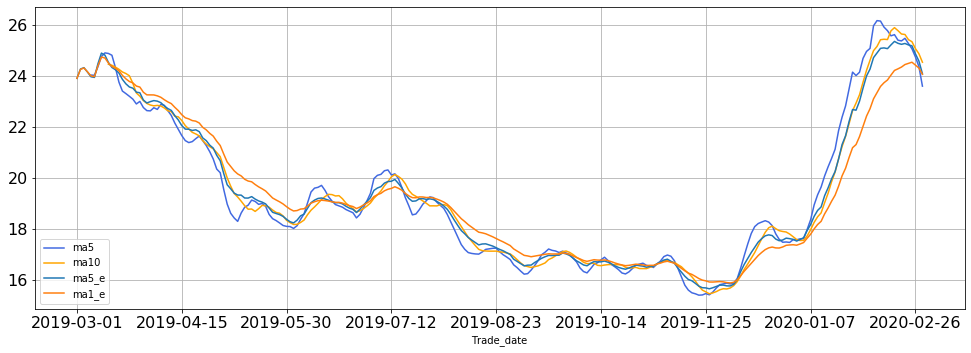

In [67]:
df['ma5']=df['close'].rolling(5).mean()
df['ma10']=df['close'].rolling(10).mean()

In [52]:
 df=df.drop(columns=["Unnamed: 0","ts_code","pre_close","pct_chg"])

In [72]:
df = df[df.index>df.index[9]]



dpi = 72.
xinch = 1200 / dpi
yinch = 400 / dpi
plt.figure(figsize=(xinch,yinch))

plt.plot(data_list, df["ma5"], color='royalblue',label="ma5")
plt.plot(data_list, df["ma10"], color='orange',label="ma10")
plt.plot(data_list, df["ma5_e"], label="ma5_e")
plt.plot(data_list, df["ma1_e"],label="ma1_e")
plt.legend()

plt.xlabel("Trade_date")
plt.tick_params(labelsize=16) 
#把x轴的刻度间隔设置为30，并存在变量里大小
x_major_locator=MultipleLocator(30)  
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.grid()
plt.show()


In [73]:
df

,open,high,low,close,change,vol,amount,ma5,ma10
trade_date,,,,,,,,,
2009-11-13,38.57,41.87,38.57,40.76,2.20,60369.77,2.447294e+05,38.998,38.802
2009-11-16,40.80,41.30,39.62,41.00,0.24,32838.51,1.327940e+05,39.302,38.942
2009-11-17,40.90,41.82,40.55,40.90,-0.10,24095.25,9.908507e+04,39.888,39.342
2009-11-18,41.00,43.16,41.00,42.84,1.94,40626.29,1.716167e+05,40.812,39.824
2009-11-19,42.90,47.10,42.72,44.91,2.07,59738.78,2.692390e+05,42.082,40.355
...,...,...,...,...,...,...,...,...,...
2020-02-24,25.01,25.20,24.53,24.93,-0.50,303970.21,7.547625e+05,25.266,25.417
2020-02-25,24.30,25.76,23.55,25.00,0.07,445802.96,1.105106e+06,25.060,25.337
2020-02-26,24.34,24.74,23.28,23.29,-1.71,312641.47,7.500949e+05,24.738,25.067
